In [1]:
try:
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

print(tf.__version__)

2.4.0


In [3]:
# MNIST 데이터세트 불러오기
(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()
print(train_X.shape, train_Y.shape)
train_X = train_X / 255.0
test_X = test_X / 255.0


(60000, 28, 28) (60000,)


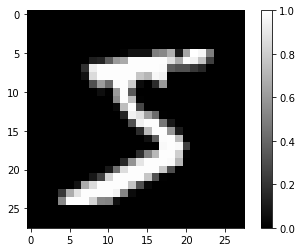

5


In [4]:
# MNIST 데이터세트 확인
plt.imshow(train_X[0].reshape(28, 28), cmap='gray')
plt.colorbar()
plt.show()
print(train_Y[0])

In [5]:
# Dense 오토인코더 모델 정의
train_X = train_X.reshape(-1, 28*28)
test_X = test_X.reshape(-1, 28*28)
print(train_X.shape, train_Y.shape)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(784, activation='relu', input_shape=(784,)),
    #tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(784, activation='sigmoid')
])
model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

# Dense 오토인코더 모델 학습
model.fit(train_X, train_X, epochs=10, batch_size=256, verbose=0)

(60000, 784) (60000,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               50960     
Total params: 716,640
Trainable params: 716,640
Non-trainable params: 0
_________________________________________________________________


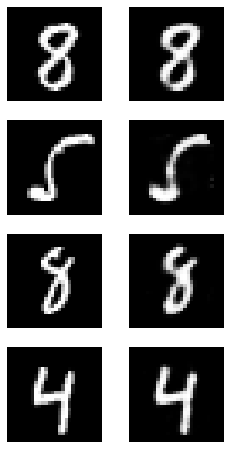

In [6]:
# test 데이터로 Dense 오토인코더의 이미지 재생성
plt.figure(figsize=(4, 8))
for c in range(4):
    plt.subplot(4, 2, c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    plt.subplot(4, 2, c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

#model.evaluate(test_X, test_X)